# Python – Packages for data visualization

## Contents
### Overview on plot and data types
### Python packages for visualization
#### Matplotlib - the classic
#### Pandas visualization
#### Seaborn - for statisticians
#### Bokeh - the interactive


Why visualize?
===================
> `"Use a picture. It's worth a thousand words."` [1][brisbane]

- Human brain is much better at processing information visually
    - Example: Anscombe's quartet [2][anscombe]

[brisbane]: https://en.wikipedia.org/wiki/A_picture_is_worth_a_thousand_words "Arthur Brisbane, 'Speakers Give Sound Advice,' Syracuse Post Standard (page 18), March 28, 1911."
[anscombe]: https://en.wikipedia.org/wiki/Anscombe%27s_quartet "Anscombe's quartet"

- Domain-specific visualizations help a lot the domain experts
    - e.g. 3D engineering models

- In Data Analysis
    - Exploratory Data Analysis
    - Communicating results


 - Takes ~3-6x more time to prepare a diagram than speech/text :(

## Plot types
- A non-exhaustive list of often used plots

<table>
  <thead>
  <tr>
    <td>Plot type</td>
    <td>Number of variables displayed</td>
    <td>Type of data displayed</td>
  </tr>
  </thead>
  <tbody>
  <tr>
    <td>barchart</td>
    <td>1</td>
    <td>categorical</td>
  </tr>
  <tr>
    <td>histogram</td>
    <td>1</td>
    <td>continuous</td>
  </tr>
  <tr>
    <td>boxplot</td>
    <td>1</td>
    <td>continuous</td>
  </tr>
  <tr>
    <td>scatterplot</td>
    <td>2 (3 --> bubblechart)</td>
    <td>continuous</td>
  </tr>
  <tr>
    <td>heatmap</td>
    <td>2 (3)</td>
    <td>mixed/continuous</td>
  </tr>
  </tbody>
</table>

- [Periodic table of visualization](http://just-startkidsandschools.com/wp-content/uploads/2013/04/periodic-table-of-visualization-methods.jpg)

In [1]:
# importing matplotlib as usual
import numpy as np
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png', 'svg')

sigma = 10
mu = 5
normal_random = np.random.randn(1000) * sigma + mu;

## Barchart
- Ideal for comparing groups within the data set


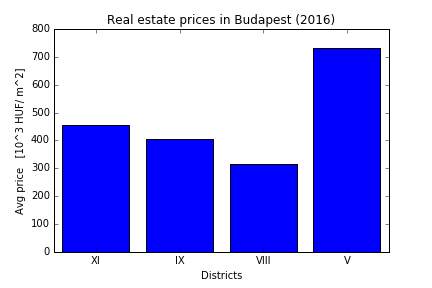

In [2]:
plt.bar([1, 2, 3, 4], [455, 404, 317, 730], tick_label=["XI", "IX", "VIII","V"], align='center');
plt.xlabel("Districts"); plt.ylabel("Avg price   [10^3 HUF/ m^2]");
plt.title("Real estate prices in Budapest (2016)");

## Histogram
- Displays the empirical distribution of a variable
- Parameters
    - bin width or bin count (bins are normally of equal length)
    - normalized or not

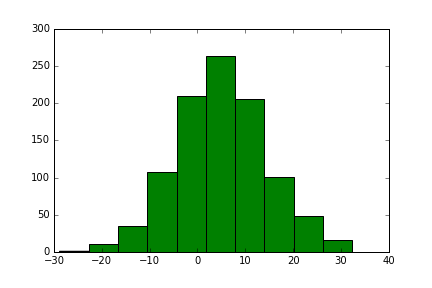

In [3]:
# provided matplotlib is imported and normal_random is a Gaussian distrib N(5, 10)
plt.hist(normal_random, color="g");

## Boxplot
- A very compact representation of the samples
- Also called box and whisker plot if whiskers are displayed
- Usually depicted
    - lower (Q1) and upper (Q2) quartiles and median (25th, 75th and 50th percentile)
    - extreme values outside the $(Q_1-1.5 \cdot IQR, Q_3+1.5 \cdot IQR)$ interval

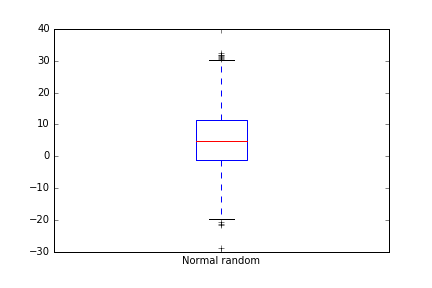

In [4]:
plt.boxplot(normal_random, labels=["Normal random"]);

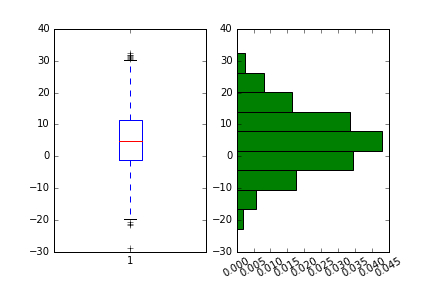

In [5]:
plt.subplot(1,2,1) # create a 1-row 2-column figure, activate the 1st subplot
plt.boxplot(normal_random) # create a boxplot
plt.subplot(1,2,2) # activate the 2nd subplot
plt.hist(normal_random, orientation='horizontal', normed=True, color="g"); # create rotated histogram
plt.xticks(rotation=30);

## Scatterplot
- Points in 2 dimensions
- Coordinates are given by the (x,y) pairs

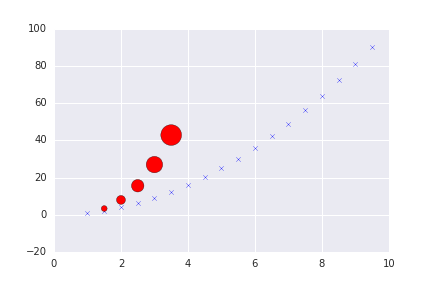

In [21]:
xvars = np.arange(1,10,0.5);
plt.scatter(x=xvars, y=xvars**2, marker="x");
plt.scatter(x=xvars[1:6], y=xvars[1:6]**3, c="r", marker='o', s=xvars[1:6]**3*10); # using scatterplot as bubble-chart

## Heatmap
- the plot is split up into equal tiles
    - each tile (raster) corresponds to an (x,y) combination
    - color of the tile is given by a 3rd attribute in the data set
- example: git punch card as heatmap

In [7]:
from urllib.request import urlopen
import simplejson
from pandas.core.frame import DataFrame
commits = DataFrame(simplejson.loads(urlopen("https://api.github.com/repos/pydata/pandas/stats/punch_card").read()), 
          columns=["weekday","hour","commits"])
commits.head(3)

,weekday,hour,commits
0,0,0,47
1,0,1,18
2,0,2,21


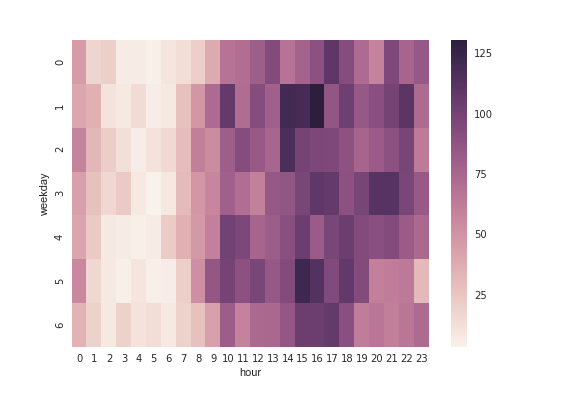

In [8]:
import seaborn as sns
sns.heatmap(commits.pivot("weekday","hour","commits"));

## Matplotlib - the classic
- started in 2007, latest stable version 1.5.1
- relies on `numpy` for data representation
- provides an interface similar to Matlab
    - state-machine like behaviour
    - effective for simple plotting needs
- an OO API is also exposed
    - full control of the graphical elements
- multiple backends exist
    - rendering the plots interactively
    - saving them to various file formats (jpg, png, svg, pdf)

## Pandas - plot from DataFrame
- Pandas is mainly a data analysis package
- It adds support for visualization
    - builds on top of Matplotlib
    - higher level API
    - most plot types are accessible form the DataFrame directly
- Reasonable choice for simple plots when using DF

## Seaborn
- Separate package with statistical visualizations in mind
    - support a wide range of plot types (e.g. parallel, violin plot, heatmap)
    - supports facetting (previously Pandas did that)

## Bokeh
- It is based on JavaScript and canvas (client-side visualization)
- It knows the concept of e.g. linked brushing
- Bokeh also provides a server component where data can be dynamically filtered

Further references
-------

#### [Matplotlib](http://matplotlib.org/1.5.1/contents.html)

 - [General usage (Ch 12)](http://matplotlib.org/1.5.1/faq/usage_faq.html)
 - [Gallery with code snippets](http://matplotlib.org/gallery.html)
 - [Detailed API doc](http://matplotlib.org/1.5.1/api/index.html) (or simply `help()`)

#### Pandas
 - [Visualization section of docu](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

#### [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/)
 - [Tutorial](https://stanford.edu/~mwaskom/software/seaborn/tutorial.html)
 - [Gallery](https://stanford.edu/~mwaskom/software/seaborn/examples/index.html)
 
#### [Bokeh](http://bokeh.pydata.org/en/latest/)
 - [User's guide](http://bokeh.pydata.org/en/latest/docs/user_guide.html)
 - [Reference](http://bokeh.pydata.org/en/latest/docs/reference.html)

